# Intuition for Supervised Learning

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } div.text_cell_render { font-family: 'Human BBY Office'; font-size: 12pt; line-height: 145%;}</style>"))

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

import sklearn as sk
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df = pd.read_csv('~/data/glass/glass.data', sep=",", header=None, encoding="ISO-8859-1")
df.columns = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
y = df[['Type']]
X = df.drop(columns=['ID', 'Type'])
df.drop(columns=['ID'])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.780,0.06,8.750,0.000,0.00,A
1,1.51761,13.89,3.60,1.36,72.730,0.48,7.830,0.000,0.00,A
2,1.51618,13.53,3.55,1.54,72.990,0.39,7.780,0.000,0.00,A
3,1.51766,13.21,3.69,1.29,72.610,0.57,8.220,0.000,0.00,A
4,1.51742,13.27,3.62,1.24,73.080,0.55,8.070,0.000,0.00,A
5,1.51596,12.79,3.61,1.62,72.970,0.64,8.070,0.000,0.26,A
6,1.51743,13.30,3.60,1.14,73.090,0.58,8.170,0.000,0.00,A
7,1.51756,13.15,3.61,1.05,73.240,0.57,8.240,0.000,0.00,A
8,1.51918,14.04,3.58,1.37,72.080,0.56,8.300,0.000,0.00,A
9,1.51755,13.00,3.60,1.36,72.990,0.57,8.400,0.000,0.11,A


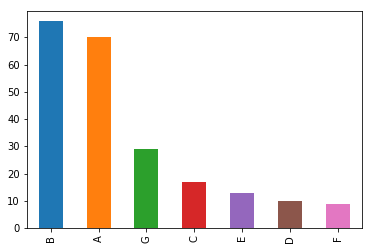

In [10]:
df['Type'].value_counts().plot(kind="bar")

In [82]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [83]:
clf = DecisionTreeClassifier(max_features = "auto", random_state=42)
clf.fit(X_train, y_train.values.ravel())
clf_score = clf.score(X_test, y_test.values.ravel())
print("Decision Tree model correct percentage: " + '{0:.1f}%'.format(clf_score * 100))

Decision Tree model correct percentage: 64.4%


In [85]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train.values.ravel())
neigh_score = neigh.score(X_test, y_test.values.ravel())
print("Nearest Neighbors model correct percentage: " + '{0:.1f}%'.format(neigh_score * 100))

Nearest Neighbors model correct percentage: 68.9%


In [86]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train.values.ravel())
gbm_score = gbm.score(X_train, y_train.values.ravel())
print("Gradient Boost model correct percentage: " + '{0:.1f}%'.format(gbm_score * 100))

Gradient Boost model correct percentage: 100.0%


In [87]:
# Try data with new inputs resembling Type 6
X_random = np.array([[1.50,14.45,2.22,1.61,72.2,0.00,9.2,0.00,0.00]])
print("Decision Tree model predicts this data is from type: " + str(clf.predict(X_random)[0]))
print("Gradient Boost model predicts this data is from type: " + str(gbm.predict(X_random)[0]))

Decision Tree model predicts this data is from type: 3
Gradient Boost model predicts this data is from type: 6


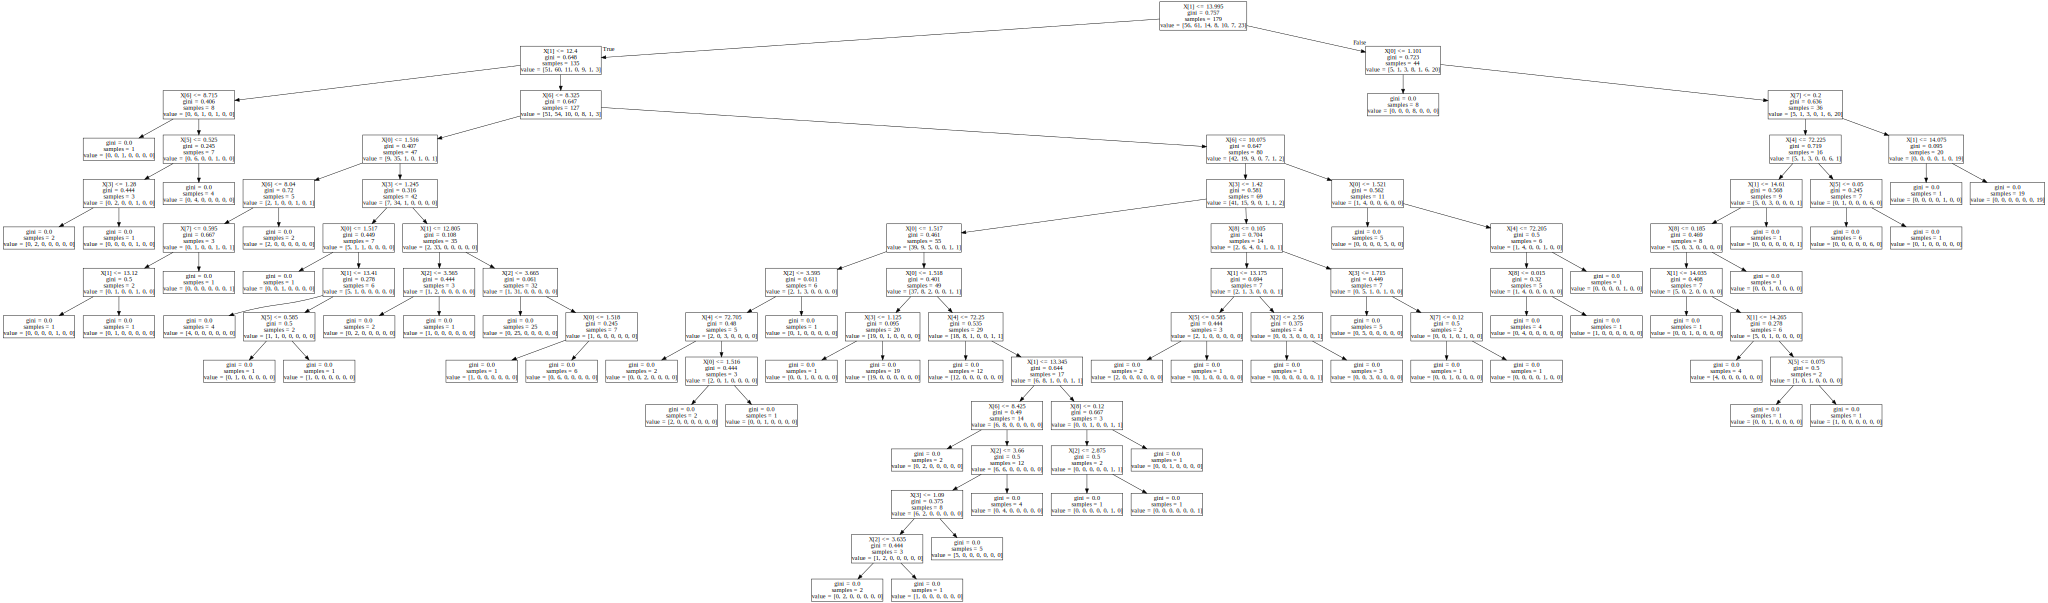

In [84]:
export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)